In [3]:
# r_clusterpro env

library(ggrepel)
library(clusterProfiler) 
library(org.Mm.eg.db) 


In [1]:
resultdir<-'./'
dir.create(resultdir)
setwd(resultdir)
figuredir<-resultdir

Warning message in dir.create(resultdir):
“'/DATA/User/hemingmin/AS/merge7/results/fig4d_update_220240919'已存在”


In [2]:
top100<-read.delim("./data/fig4d_Sox4_regulons_top100.csv",header = T,sep = ',')

In [5]:

 genes=as.data.frame(na.omit(AnnotationDbi::select(org.Mm.eg.db,
                                                    keys = top100$target,
                                                    columns = 'ENTREZID',
                                                    keytype = 'SYMBOL')))

'select()' returned 1:1 mapping between keys and columns



In [6]:

genes<-merge(genes,top100,by.x="SYMBOL",by.y="target",by="SYMBOL")

In [7]:
# head(genes)
geneList<-genes[,c("ENTREZID","log.gene2weight.")]
genes2<-geneList[,2]
names(genes2)<-geneList$ENTREZID
# genes2

In [8]:
 gene.GO <- enrichGO(gene = genes$ENTREZID,
                    OrgDb = org.Mm.eg.db,
                    keyType = "ENTREZID",
                    ont = "BP",
                    pAdjustMethod = "BH",
                    pvalueCutoff = 0.01,
                    qvalueCutoff = 0.05,
                    readable = T)

Warning message in cnetplot.enrichResult(x, ...):
“Use 'cex.params = list(category_node = your_value)' instead of 'cex_category'.
 The cex_category parameter will be removed in the next version.”
Warning message in cnetplot.enrichResult(x, ...):
“Use 'cex.params = list(gene_label = your_value)' instead of 'cex_label_gene'.
 The cex_label_gene parameter will be removed in the next version.”
Scale for size is already present.
Adding another scale for size, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for edge_colour is already present.
Adding another scale for edge_colour, which will replace the existing scale.


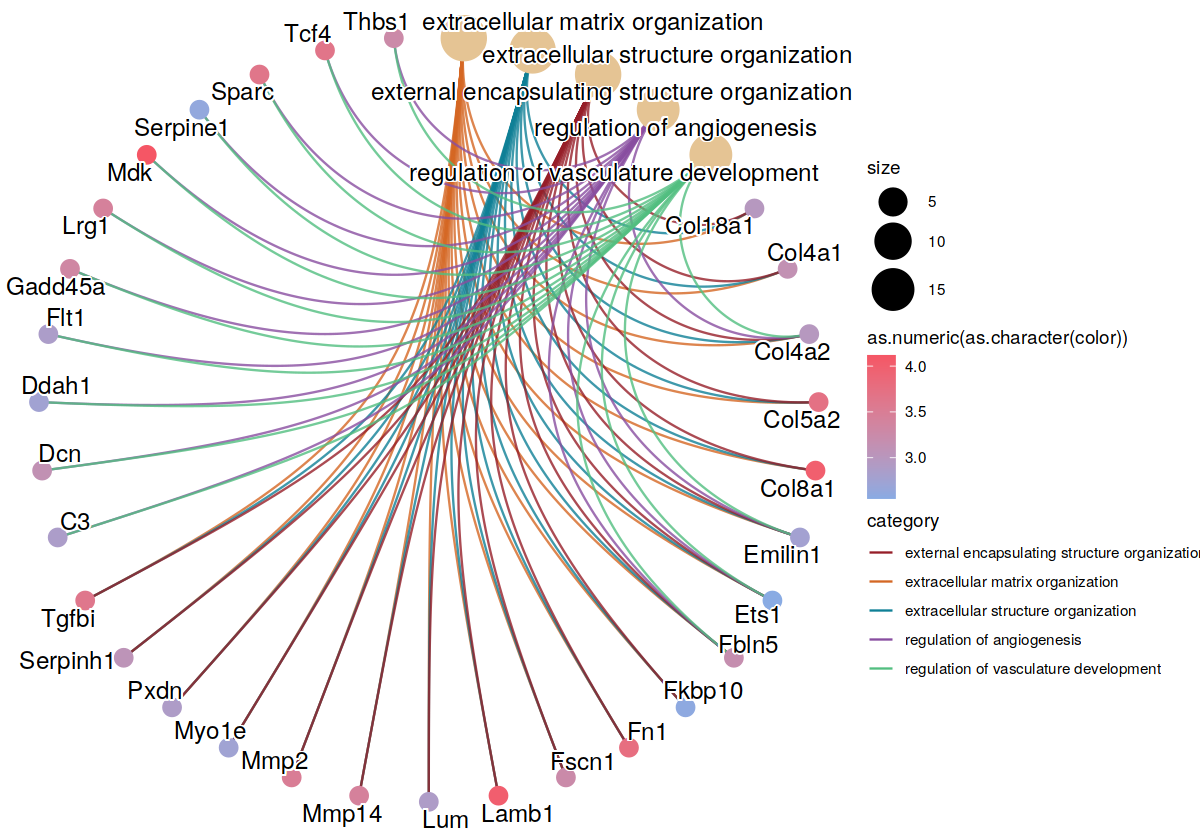

In [209]:
width=10
height=7
library(ggsci)
library(scales)
library(RColorBrewer)

options(repr.plot.width = width, repr.plot.height=height)
p<-cnetplot(gene.GO, showCategory = 5,cex_label_gene=1,
             cex_category = 1.5,
         color.params = list(foldChange = genes2,edge=TRUE),

         circular = TRUE)+ scale_color_gradientn(colours = c("#89ABE3FF","#F55665FF"))+
scale_edge_colour_manual(values = c('#961E28', #红
                                      '#D46724',#橙色
                                      '#0f8096',#蓝色
                                     '#884EA0',#紫色
                                     '#52BE80')) #绿色
p
# ggsave(p,filename = "fig4d_go_BP_2.pdf",width = width,height = height)